# Feature_selection-part2

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
wiki_data = pd.read_csv('/Users/atousa/Desktop/McMaster/BDA-102/Week3-feature_selection/people_wiki.csv', index_col='name')

In [3]:
np.shape(wiki_data)

(42786, 2)

In [3]:
wiki_data.head()

,URI,text
name,,
Digby Morrell,<http://dbpedia.org/resource/Digby_Morrell>,digby morrell born 10 october 1979 is a former...
Alfred J. Lewy,<http://dbpedia.org/resource/Alfred_J._Lewy>,alfred j lewy aka sandy lewy graduated from un...
Harpdog Brown,<http://dbpedia.org/resource/Harpdog_Brown>,harpdog brown is a singer and harmonica player...
Franz Rottensteiner,<http://dbpedia.org/resource/Franz_Rottensteiner>,franz rottensteiner born in waidmannsfeld lowe...
G-Enka,<http://dbpedia.org/resource/G-Enka>,henry krvits born 30 december 1974 in tallinn ...


In [4]:
wiki_data2=wiki_data['text']

In [5]:
wiki_data2.head()

name
Digby Morrell          digby morrell born 10 october 1979 is a former...
Alfred J. Lewy         alfred j lewy aka sandy lewy graduated from un...
Harpdog Brown          harpdog brown is a singer and harmonica player...
Franz Rottensteiner    franz rottensteiner born in waidmannsfeld lowe...
G-Enka                 henry krvits born 30 december 1974 in tallinn ...
Name: text, dtype: object

# Word Count Vectors

In [6]:
name = 'Barack Obama'
text = wiki_data2[name]
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform([text])
features = count_vectorizer.get_feature_names()

In [7]:
count_matrix.shape

(1, 270)

In [8]:
type(count_matrix)

scipy.sparse.csr.csr_matrix

In [12]:
count_matrix2=count_matrix.toarray()[0,:]

In [13]:
count_matrix2.shape

(270,)

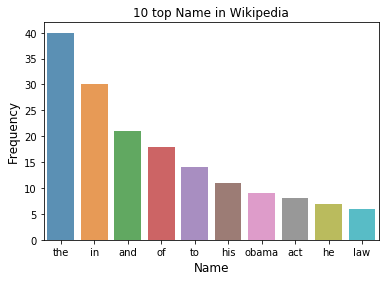

In [70]:
array_data = pd.Series(count_matrix2, index = features).sort_values(ascending=False)
sns.barplot(array_data[:10].index, array_data[:10].values, alpha=0.8)
plt.title('10 top Name in Wikipedia')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Name', fontsize=12)
plt.show()

# TF-IDF Vectors

In [10]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(wiki_data['text'])
features = tfidf_vectorizer.get_feature_names()

In [14]:
tfidf_matrix

<42786x437503 sparse matrix of type '<class 'numpy.float64'>'
	with 7417853 stored elements in Compressed Sparse Row format>

In [12]:
row = wiki_data.index.get_loc(name)
tfidf_matrix2=tfidf_matrix.getrow(row)

In [17]:
tfidf_matrix2.shape

(1, 437503)

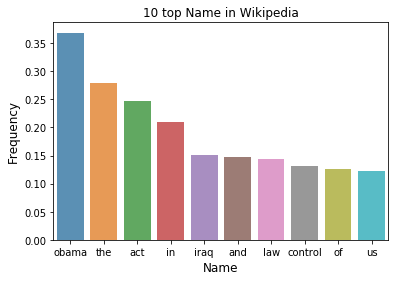

In [18]:
array_data = pd.Series(tfidf_matrix2.toarray()[0,:],index = features).sort_values(ascending=False)
sns.barplot(array_data[:10].index, array_data[:10].values, alpha=0.8)
plt.title('10 top Name in Wikipedia')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Name', fontsize=12)
plt.show()